### Submitted by     : Krishnan Hariharan, Pradip Sen
### Roll No.              :  D19015, D19023

## Graph Generation

#### Q) Create a function which takes dataframe, column list and directory as arguments where column and directory are optional. The function should generate histograms & box-plots for numerical variables as well as bar-plot graphs for categorical variables and save the results in the directory passed as argument.

In [199]:
#Importing all required libraries 
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [195]:
#Graph function takes dataframe, column list and directory as arguments. This function extracts the dataframe columns 
#segregating them and numerical and categorical variables and generates the histograms & box-plot, and bar-plot graphs 
#respectively and saves them in the target directory/folder

def graph(data,format,column=None,directory=None):

    #Conditions for appending the column(s) passed as argument
    col_list=[]                 
    if column==None:                 
        col_list = list(data.columns)
    elif type(column) is str:        
        col_list.append(column)
    elif type(column) is list:       
        for i in column:
            col_list.append(i)
            
    
    dir=os.getcwd()    
    
    #Conditions for setting the directory for saving the generated files
    if directory==None:          
        directory=os.getcwd()
        folder='Results'
        os.mkdir(folder)
        os.chdir(directory+'/'+folder)
    else:
        os.chdir(directory)
        os.mkdir('Results')
        os.chdir(directory+'/Results')
        
        
    #Conditions for setting the extensions (format) for the generated files
    if format==1:
        ext='png'
    elif format==2:
        ext='jpeg'
    elif format==3:
        ext='tiff'
    elif format==4:
        ext='pdf'
        
    #Conditions for segregating the numerical and categorical variables in the appended list of columns
    num_cols=[]
    cat_cols=[]
    for att in col_list:
        if data[att].dtype == 'object':
            cat_cols.append(att)
        else:
            if data[att].dtype == 'float64':
                num_cols.append(att)
            elif data[att].dtype == 'int64':
                #check for discrete values : If no. of unique values in a column is less than 10 percent of total values,
                                            #it is considered as discrete and moved to categorical column list
                if len(list(pd.Categorical(data[att]).categories))<int(0.1*(data[att].size)):                                                                   
                    cat_cols.append(att)
                else:
                    num_cols.append(att)
                    
        
    #Generating histograms and box-plot graphs for numerical variables
    for c1 in num_cols:  

        #Histogram
        data.hist(column=c1,
                grid=False,
                figsize=(8,6),
                color='green')
        plt.xlabel(c1,fontsize=8)
        plt.ylabel('Frequency',fontsize=8)
        plt.title('Histrogram of '+c1,fontsize=12)
        plt.grid(True)
        plt.savefig('Histogram of '+c1+'.'+ext)
        plt.close()
           
         
        #Box-plot   
        data.boxplot(column=c1,
                        notch=True,
                        grid=True,
                        figsize=(4,4),
                        vert=True)
        desc=data[c1].describe()
        
        #IMPROVIZATION 3: Making Boxplot graphs meaningful with information
        
        #Displaying the relevant information to read box-plot
        plt.title('\n\n'+'Count: '+str(desc[0])+'\n'+'Mean: '+str(desc[1])+'\n'+'Standard Deviation: '+str(desc[2])
                  +'\n\n'+'Min: '+str(desc[3])+'\n'+'Q1: '+str(desc[4])
                  +'\n'+'Median: '+str(desc[5])+'\n'+'Q3: '+str(desc[6])
                  +'\n'+'Max: '+str(desc[7])+'\n\nBoxplot of '+c1,fontsize=12)
        plt.grid(True)
        plt.savefig('Boxplot of '+c1+'.'+ext,bbox_inches = "tight")
        plt.close()

        
    #Generating bar-plot graphs for categorical variables 
    for c2 in cat_cols:
        
        #Bar-plot
        data[c2].value_counts().plot(kind='bar',
                                         figsize=(8,6),
                                         color='red')
        plt.xlabel(c2,fontsize=8)
        plt.ylabel('Frequency',fontsize=8)
        plt.title('Barplot of '+c2,fontsize=12)
        plt.grid(True)
        plt.savefig('Barplot of '+c2+'.'+ext)
        plt.close()
        
        
    #IMPROVIZATION 2: Scatter Matrix and Correlation Heat Map for the columns  
    
    #Generating the pair-wise scatter matrix for the numerical variables
    #Scatter plots explain how the variables are correlated
    scatter_matrix(data.drop(cat_cols,axis=1),alpha=0.5,figsize=(12,12), diagonal='hist')
    plt.title('Pair-wise scatter plot',fontsize=12)
    plt.grid(True)
    plt.savefig('Pair-wise scatter plot.'+ext,bbox_inches = "tight")
    plt.close()
    
    #Correlation Heat-map Generation
    sns_heat = sns.heatmap(data.corr())
    fig = sns_heat.get_figure()
    fig.savefig('Correlation Heat Map.png')
        
    os.chdir(dir)  #setting the directory back to default
    

Please enter the format of the results graphs (1/2/3/4 for png/jpeg/tiff/pdf): 1
Thank you. Kindly wait till the graphs are generated.
Graphs are generated. Please check the directory


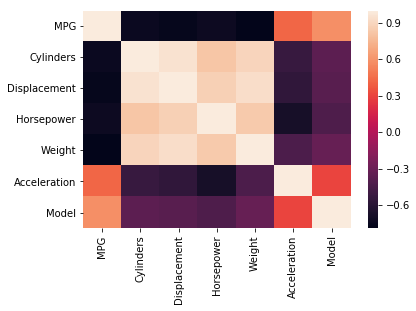

In [196]:
#Reading the dataset and initializing to the dataframe
df = pd.read_csv('C:/Users/KRISH/Desktop/Python/Machine Learning/Cars.csv')  
cols = df.columns

#IMPROVIZATION 3: Different file format for saving the results

#Input the file formats form the user
while(True):
    f=int(input('Please enter the format of the results graphs (1/2/3/4 for png/jpeg/tiff/pdf): '))
    if f==1 or f==2 or f==3 or f==4:
        print('Thank you. Kindly wait till the graphs are generated.')
        break
    else:
        print('Not a valid input. Please Try again')
        continue


#Calling the graph function with the arguments
graph(df,f) 
print('Graphs are generated. Please check the directory')